In [1]:
import cv2
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip,RandomRotation,Rescaling,RandomContrast

In [14]:
def test_img(img):
#     our_model = pickle.load(open('./Saved_Model/CNN_Model.h5','rb'))
    our_model = keras.models.load_model('./keras_model.hdf5')
#     capture_score = our_model.score()

    face_model = cv2.CascadeClassifier('../Resources/haarcascade_frontalface_default.xml')

#     img = cv2.imread('./Resources/Test/85-with-mask.jpg')

    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

    faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)

    #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    mask_label = {0:'Mask Found',1:'No Mask Found'}
    color_label = {0:(0,255,0),1:(255,0,0)}
    MIN_DISTANCE = 0

    #check for no. of faces in the image
    # if more than one face found,
    if len(faces)>=1:
        label = [0 for i in range(len(faces))]
        for i in range(len(faces)-1):
            for j in range(i+1, len(faces)):
                dist = distance.euclidean(faces[i][:2],faces[j][:2])
                if dist<MIN_DISTANCE:
                    label[i] = 1
                    label[j] = 1
        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
        # For every face found, 
        for i in range(len(faces)):
            (x,y,w,h) = faces[i]
            crop = new_img[y:y+h,x:x+w]
            crop = cv2.resize(crop,(128,128))
            crop = np.reshape(crop,[1,128,128,3])/255.0        
            mask_result = our_model.predict(crop)
            
            cv2.putText(new_img,mask_label[round(mask_result[0][0])],(x, y-3), cv2.FONT_HERSHEY_SIMPLEX,0.5,color_label[label[i]],2)
            cv2.rectangle(new_img,(x,y),(x+w,y+h),color_label[label[i]],1)
            
        plt.figure(figsize=(10,10))
        return plt.imshow(new_img)
                
    else:
        return print("No image")

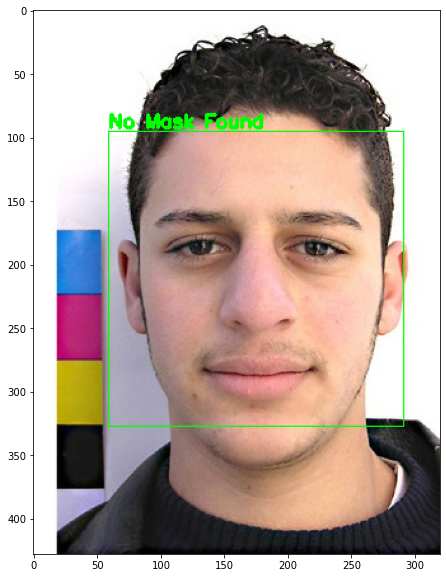

In [17]:
img = cv2.imread('../Resources/Test/64.jpg')
test_img(img)